## Функции Активации

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import torch

In [ ]:
import numpy as np

## MLP

## Данные

In [ ]:
import torchvision as tv

In [ ]:
import time

In [ ]:
BATCH_SIZE=256

In [ ]:
train_dataset = tv.datasets.MNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset = tv.datasets.MNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



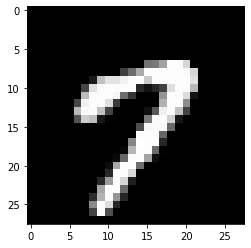

In [ ]:
plt.imshow(train_dataset[15][0].numpy().reshape(28,28), cmap='gray')

## Модель

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [ ]:
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
trainer = torch.optim.SGD(model.parameters(), lr=0.01)
num_epochs = 10

In [ ]:
def train_model():
  for ep in range(num_epochs):
    train_iters, train_passed  = 0, 0 # начальные величины для счетчиков
    train_loss, train_acc = 0., 0. # начальные величины для счетчиков
    start=time.time() # начальные величины для счетчиков

    model.train() # данная штука не имеет смысла,т.к. нет Dropout и Батч-нормализации, но привыкаем
    for X, y in train:
        trainer.zero_grad()
        y_pred = model(X)
        l = loss(y_pred, y)
        l.backward()
        trainer.step()
        train_loss += l.item()
        train_acc += (y_pred.argmax(dim=1) == y).sum().item()
        train_iters += 1
        train_passed += len(X) # количество картинок прошедших через нашу модель

    test_iters, test_passed  = 0, 0 # начальные величины для счетчиков
    test_loss, test_acc = 0., 0. # начальные величины для счетчиков
    model.eval()
    for X, y in test:
        y_pred = model(X)
        l = loss(y_pred, y)
        test_loss += l.item()
        test_acc += (y_pred.argmax(dim=1) == y).sum().item()
        test_iters += 1
        test_passed += len(X)

    print("ep: {}, taked: {}, train_loss: {}, train_acc: {}, test_loss: {}, test_acc: {}".format(
        ep, round(time.time() - start,2), train_loss / train_iters, train_acc / train_passed,
        test_loss / test_iters, test_acc / test_passed)
    )

In [ ]:
train_model()

ep: 0, taked: 8.24, train_loss: 2.0126185888939716, train_acc: 0.5619666666666666, test_loss: 1.6391657382249831, test_acc: 0.7323
ep: 1, taked: 7.89, train_loss: 1.2949190961553696, train_acc: 0.7769666666666667, test_loss: 0.9747830957174302, test_acc: 0.8179
ep: 2, taked: 8.51, train_loss: 0.8411729539962525, train_acc: 0.8305166666666667, test_loss: 0.6941425532102585, test_acc: 0.8492
ep: 3, taked: 7.95, train_loss: 0.6499574193295012, train_acc: 0.8524333333333334, test_loss: 0.5672424182295799, test_acc: 0.8675
ep: 4, taked: 7.98, train_loss: 0.5538075100868306, train_acc: 0.8648, test_loss: 0.49624885283410547, test_acc: 0.879
ep: 5, taked: 8.03, train_loss: 0.49624671384375146, train_acc: 0.87445, test_loss: 0.4509859189391136, test_acc: 0.8863
ep: 6, taked: 8.26, train_loss: 0.4579075089794524, train_acc: 0.8810333333333333, test_loss: 0.41965026073157785, test_acc: 0.8914
ep: 7, taked: 7.95, train_loss: 0.43047759190518803, train_acc: 0.8862666666666666, test_loss: 0.3966505

1. Время обучения =7сек
2. train_loss: 0.39
3. test_loss: 0.36
4. train_accuracy: 0.89
5. test_accuracy: 0.9

## Пробуем заменить SGD на Adam и RMSProp. Увеличится ли скорость сходимости?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)
)

In [ ]:
trainer = torch.optim.Adam(model.parameters(), lr=0.01)
train_model()

ep: 0, taked: 8.61, train_loss: 0.25029024562223795, train_acc: 0.9239833333333334, test_loss: 0.13152368323644623, test_acc: 0.9591
ep: 1, taked: 8.47, train_loss: 0.10028768938351819, train_acc: 0.9695, test_loss: 0.11322968893218785, test_acc: 0.9661
ep: 2, taked: 8.43, train_loss: 0.07044392681006897, train_acc: 0.9779, test_loss: 0.11382915865833639, test_acc: 0.9675
ep: 3, taked: 8.53, train_loss: 0.05960544745853924, train_acc: 0.9808, test_loss: 0.10274672659397766, test_acc: 0.9702
ep: 4, taked: 8.43, train_loss: 0.05027155226413557, train_acc: 0.9834666666666667, test_loss: 0.11104641583369812, test_acc: 0.9737
ep: 5, taked: 8.46, train_loss: 0.04935691087417542, train_acc: 0.9837666666666667, test_loss: 0.13701282094116324, test_acc: 0.9651
ep: 6, taked: 9.1, train_loss: 0.04388046587341802, train_acc: 0.98615, test_loss: 0.1236226784036262, test_acc: 0.9714
ep: 7, taked: 8.63, train_loss: 0.04862004923237924, train_acc: 0.98495, test_loss: 0.14112221317336662, test_acc: 0.9

1. Время обучения =7сек
2. train_loss: 0.039
3. test_loss: 0.14
4. train_accuracy: 0.99
5. test_accuracy: 0.97

Модель начинает переобучаться, т.к. train-параметры становятся выше, чем test-параметры, что есть плохо

Но модель обучается быстрее

**Вывод:**

**1. модель обучается быстрей**

**2. модель начинает переобучаться**

## Пробуем сделать больше слоев в сети - увеличится ли качество?

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Flatten(),
    torch.nn.Linear(784, 512),
    torch.nn.ReLU(),
    torch.nn.Linear(512, 256),
    torch.nn.ReLU(),
    torch.nn.Linear(256, 128),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

In [ ]:
trainer = torch.optim.Adam(model.parameters(), lr=0.01)
train_model()

ep: 0, taked: 13.84, train_loss: 0.3073397328720448, train_acc: 0.9056166666666666, test_loss: 0.17058088993653656, test_acc: 0.9511
ep: 1, taked: 15.63, train_loss: 0.1306071736730952, train_acc: 0.9629333333333333, test_loss: 0.13126266231993214, test_acc: 0.9632
ep: 2, taked: 13.66, train_loss: 0.09777001806812242, train_acc: 0.9711, test_loss: 0.12259481191431405, test_acc: 0.9674
ep: 3, taked: 13.51, train_loss: 0.08301640225752713, train_acc: 0.9762, test_loss: 0.1334858116475516, test_acc: 0.9667
ep: 4, taked: 14.06, train_loss: 0.0763670232127163, train_acc: 0.9780166666666666, test_loss: 0.1307870967888448, test_acc: 0.9686
ep: 5, taked: 14.12, train_loss: 0.070330442301929, train_acc: 0.98015, test_loss: 0.12207406443558284, test_acc: 0.9728
ep: 6, taked: 13.62, train_loss: 0.05951498094946146, train_acc: 0.9830833333333333, test_loss: 0.1515260207968822, test_acc: 0.9697
ep: 7, taked: 13.61, train_loss: 0.06357541020880354, train_acc: 0.98285, test_loss: 0.10723844537787955,

1. Время обучения =14сек
2. train_loss: 0.045
3. test_loss: 0.13
4. train_accuracy: 0.987
5. test_accuracy: 0.97

Модель начинает переобучаться, т.к. train-параметры становятся выше, чем test-параметры, что есть плохо

**Вывод:**

**1. модель обучается медленней**

**2. модель еще сильней переобучаться**

## Пробуем добавить регуляризацию, dropout и/или batchnorm-слои. Увеличится ли качество?

# **batchnorm-слои:**

In [ ]:
model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(784, 512),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(512),
        torch.nn.Linear(512, 256),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(256),
        torch.nn.Linear(256, 128),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(128),
        torch.nn.Linear(128, 10)
)

In [ ]:
trainer = torch.optim.Adam(model.parameters(), lr=0.01)
train_model()

ep: 0, taked: 14.08, train_loss: 0.1989839355282961, train_acc: 0.9382833333333334, test_loss: 0.1267363662016578, test_acc: 0.9615
ep: 1, taked: 14.27, train_loss: 0.10382395126321849, train_acc: 0.9678333333333333, test_loss: 0.10176992599735968, test_acc: 0.9676
ep: 2, taked: 14.42, train_loss: 0.06567821509026467, train_acc: 0.97945, test_loss: 0.10722973363444907, test_acc: 0.9664
ep: 3, taked: 13.66, train_loss: 0.05284568383061188, train_acc: 0.9832, test_loss: 0.16405558474361898, test_acc: 0.9545
ep: 4, taked: 13.97, train_loss: 0.041386211327613984, train_acc: 0.9861, test_loss: 0.12054137570085004, test_acc: 0.9658
ep: 5, taked: 14.38, train_loss: 0.037895013959682054, train_acc: 0.9873333333333333, test_loss: 0.08921722273225896, test_acc: 0.9753
ep: 6, taked: 14.85, train_loss: 0.029437780513507414, train_acc: 0.9901833333333333, test_loss: 0.12007540023187176, test_acc: 0.9712
ep: 7, taked: 14.03, train_loss: 0.02444019764364558, train_acc: 0.9916833333333334, test_loss: 

**nn.BatchNorm1d нормализация помогает проблемой с переобучением**

1. Время обучения =14сек
2. train_loss: 0.019
3. test_loss: 0.096
4. train_accuracy: 0.99
5. test_accuracy: 0.975

Модель начинает переобучаться, т.к. train-параметры становятся выше, чем test-параметры, что есть плохо

**Вывод:**

**1.?**

**2. ?**

# **dropout:**

In [ ]:
model = torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(784, 2560),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(2560, 1280),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(1280, 640),
        torch.nn.ReLU(),
        torch.nn.Dropout(0.5),
        torch.nn.Linear(640, 10)
)

In [ ]:
trainer = torch.optim.Adam(model.parameters(), lr=0.01)
train_model()

ep: 0, taked: 101.7, train_loss: 0.7488632577530882, train_acc: 0.7955333333333333, test_loss: 0.30930496882647274, test_acc: 0.9275
ep: 1, taked: 101.53, train_loss: 0.6139391111566666, train_acc: 0.8449166666666666, test_loss: 0.3083140950649977, test_acc: 0.9246
ep: 2, taked: 102.25, train_loss: 0.6370072736385021, train_acc: 0.8459, test_loss: 0.3405219031032175, test_acc: 0.9307


KeyboardInterrupt: ignored

Модель ваще не переобучается!!!, в целом результаты пока похуже, надо может количество эпох увеличить.

Результаты тестовой выборки лучше, т.к. тренировочная выборка показывает результат обучения половины данных (Dropout), а тестовая на всех данных

**Вывод:**

**1.?**

**2. ?**